In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import pyttsx3


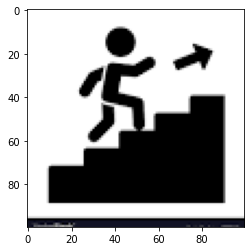

In [7]:
img = image.load_img("/users/saniyer/project2/training/stairs_up/1618585678866.png")
plt.imshow(img)

In [8]:
cv2.imread("/users/saniyer/project2/training/side_walk/1618589366703.jpeg")

array([[[ 11,  21,   5],
        [ 37,  47,  31],
        [ 79,  87,  70],
        ...,
        [ 20,  13,  40],
        [ 22,  25,  40],
        [ 16,  22,  33]],

       [[ 15,  24,  11],
        [ 26,  36,  20],
        [ 82,  89,  74],
        ...,
        [ 20,  14,  39],
        [ 19,  21,  32],
        [ 17,  23,  30]],

       [[ 28,  34,  23],
        [ 29,  35,  24],
        [ 92,  96,  85],
        ...,
        [ 17,  12,  33],
        [  9,  12,  17],
        [ 13,  18,  16]],

       ...,

       [[152, 163, 161],
        [171, 182, 180],
        [155, 166, 164],
        ...,
        [146, 151, 150],
        [125, 127, 127],
        [125, 127, 127]],

       [[150, 161, 159],
        [171, 182, 180],
        [156, 167, 165],
        ...,
        [149, 154, 153],
        [143, 145, 145],
        [143, 145, 145]],

       [[148, 159, 157],
        [157, 168, 166],
        [141, 152, 150],
        ...,
        [142, 147, 146],
        [151, 153, 153],
        [151, 153, 153]]

In [9]:
train = ImageDataGenerator(rescale =1/255)
validation = ImageDataGenerator(rescale =1/255)

In [10]:
train_dataset = train.flow_from_directory('/users/saniyer/project2/training/', target_size = (200,200), batch_size = 2, class_mode = 'binary', shuffle=False)
validation_dataset = train.flow_from_directory('/users/saniyer/project2/validation/', target_size = (200,200), batch_size = 2, class_mode = 'binary', shuffle = False)

Found 205 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [11]:
train_dataset.class_indices

{'side_walk': 0, 'stairs_up': 1}

In [12]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape =(200,200,3)), 
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #
                                     tf.keras.layers.Conv2D(32,(3,3),activation='relu',), 
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu',), 
                                     tf.keras.layers.MaxPool2D(2,2),
                                     ##
                                     tf.keras.layers.Flatten(),
                                     ##
                                     tf.keras.layers.Dense(512,activation ='relu'),
                                     ##
                                     tf.keras.layers.Dense(1,activation ='sigmoid')
                                     ])


In [13]:
                                     
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])


In [14]:
model.fit(train_dataset, epochs= 10, validation_data = validation_dataset)

Epoch 1/10
 12/103 [==>...........................] - ETA: 36s - loss: 10.9371 - accuracy: 0.5644

/Users/saniyer/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


103/103 [==============================] - 43s 404ms/step - loss: 3.3637 - accuracy: 0.6064 - val_loss: 0.5733 - val_accuracy: 0.7436
Epoch 2/10
103/103 [==============================] - 39s 376ms/step - loss: 0.5144 - accuracy: 0.7483 - val_loss: 0.8928 - val_accuracy: 0.6667
Epoch 3/10
103/103 [==============================] - 41s 397ms/step - loss: 0.4544 - accuracy: 0.8557 - val_loss: 0.5457 - val_accuracy: 0.7436
Epoch 4/10
103/103 [==============================] - 42s 403ms/step - loss: 0.4221 - accuracy: 0.8795 - val_loss: 0.6218 - val_accuracy: 0.7179
Epoch 5/10
103/103 [==============================] - 40s 391ms/step - loss: 0.3327 - accuracy: 0.9013 - val_loss: 1.0212 - val_accuracy: 0.7949
Epoch 6/10
103/103 [==============================] - 41s 401ms/step - loss: 0.2320 - accuracy: 0.9240 - val_loss: 1.0820 - val_accuracy: 0.7692
Epoch 7/10
103/103 [==============================] - 40s 393ms/step - loss: 0.2832 - accuracy: 0.9000 - val_loss: 1.3382 - val_accuracy: 0.7

In [15]:
validation_dataset.class_indices

{'side_walk': 0, 'stairs_up': 1}

In [16]:
img = image.load_img('/users/saniyer/project2/testing/53-533729_innovative-way-of-using-popular-woods-wallpaper-for.jpg' , target_size=(200, 200))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
val =  model.predict(img_array_expanded_dims)
if val == 0:
    print ("side_walk")
    engine = pyttsx3.init()
    engine.say("side walk ahead")
    engine.say("side walk ahead")
    engine.say("side walk ahead")
    engine.say("side walk ahead")
    engine.say("side walk ahead")
    engine.say("side walk ahead")
    engine.runAndWait()
else:     
    engine = pyttsx3.init()
    engine.say("caution stairs ahead")
    engine.say("caution stairs ahead")
    engine.say("caution stairs ahead")
    engine.say("caution stairs ahead")
    engine.say("caution stairs ahead")
    engine.say("caution stairs ahead")
    
    engine.runAndWait()
    print ("stairs")
    

stairs


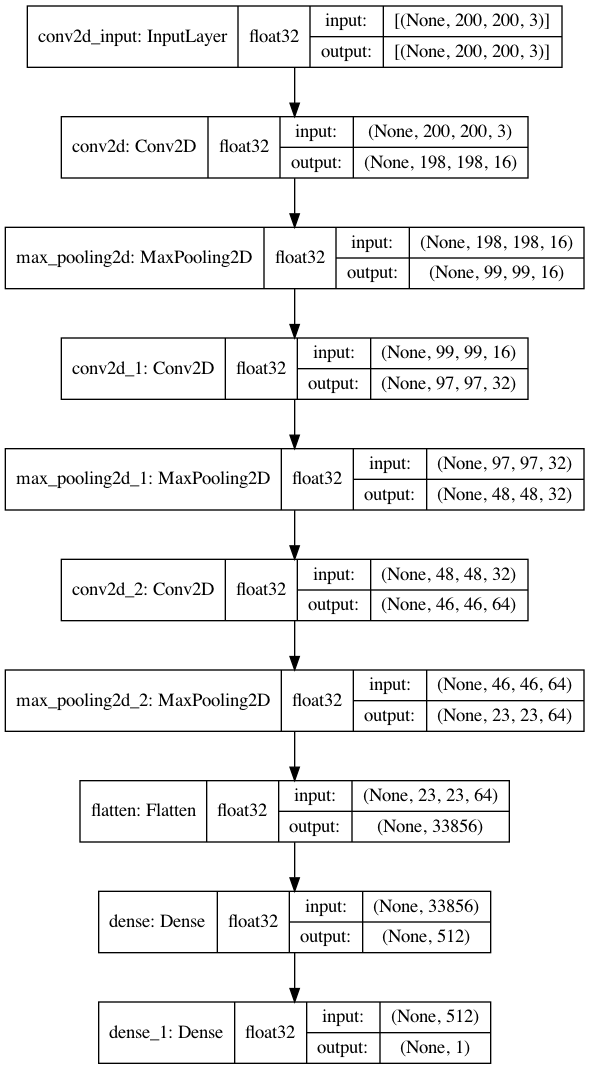

In [18]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)


In [19]:
model.save ('/users/saniyer/project2/stairs_side-walk')

INFO:tensorflow:Assets written to: /users/saniyer/project2/stairs_side-walk/assets


In [20]:
# Convert Keras model to a tflite model
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter = tf.lite.TFLiteConverter.from_saved_model('/users/saniyer/project2/stairs_side-walk')
#converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [21]:
#xxd -i model.tflite > model_data.cc : unix command